In [302]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from yelp.client import Client
import json
from ratelimit import limits
import requests
import csv
import random
# from keys import my_api_key
my_api_key = "ANN46mKbNdox3JenUq08MlOjXEqNsDNt71rKpaZwsceDlcfE012_OiylHMfgZsfXSiO5J7ORNuVxD_vXixknTHgq6GMDzJlfZu4Ywnl-KxABRTkn2atLNONB_z7IX3Yx"

In [303]:
df = pd.read_csv("../sub-est2019_all.csv", engine='python')
rural_city = df[(df["POPESTIMATE2019"]< 50000) & (df["POPESTIMATE2019"] > 1000) & (df["PRIMGEO_FLAG"]==0)]
rural_df = rural_city[["NAME", "STNAME", "POPESTIMATE2019"]]
urban_city = df[df["POPESTIMATE2019"]>= 50000]
urban_df = urban_city[["NAME", "STNAME", "POPESTIMATE2019"]]
urban_index = urban_df.loc[urban_df["NAME"] == urban_df["STNAME"]].index
urban_clean = urban_df.drop(urban_index)
random_urban_city = urban_clean[["NAME", "STNAME","POPESTIMATE2019"]].sample(n=100, random_state=1)
random_rural_city = rural_df[["NAME", "STNAME", "POPESTIMATE2019"]].sample(n=100, random_state=1)

In [306]:
my_api_key= "ANN46mKbNdox3JenUq08MlOjXEqNsDNt71rKpaZwsceDlcfE012_OiylHMfgZsfXSiO5J7ORNuVxD_vXixknTHgq6GMDzJlfZu4Ywnl-KxABRTkn2atLNONB_z7IX3Yx"
headers = {'Authorization': 'Bearer %s' % my_api_key}

rural_dict = {
    "Searched": [],
    "City": [],
    "State": [],
    "Lat": [],
    "Lng": [],
    "Restaurant": [],
    "Category": [],
#     "Category 2": [],
#     "Category 3": [],
    "Transactions":[]
}

url='https://api.yelp.com/v3/businesses/search'
offset = np.arange(0,950,50).tolist() 

for city, state in zip(random_rural_city["NAME"], random_rural_city["STNAME"]):
    for i in range(len(offset)):
        params = {
            'location': f"{city}, {state}",
            'radius': 8047,
            'limit': 50,
            'offset': offset[i]
                 }
        response = requests.get(url, params = params, headers = headers).json()
        try:
            for business in range(len(response["businesses"])):
                try:
                    rural_dict["Searched"].append(f"{city}, {state}")
                    rural_dict["City"].append(response["businesses"][business]["location"]["city"])
                    rural_dict["State"].append(response["businesses"][business]["location"]["state"])
                    rural_dict["Lat"].append(response["businesses"][business]["coordinates"]["latitude"])
                    rural_dict["Lng"].append(response["businesses"][business]["coordinates"]["longitude"])
                    rural_dict["Restaurant"].append(response["businesses"][business]["name"])
                    rural_dict["Category"].append([response["businesses"][business]["categories"][i]["title"] for i in range(len(response["businesses"][business]["categories"]))])
#                     rural_dict["Category"].append(response["businesses"][business]["categories"][0]["title"])
#                     rural_dict["Category 2"].append(response["businesses"][business]["categories"][1]["title"])
#                     rural_dict["Category 3"].append(response["businesses"][business]["categories"][2]["title"])
                    rural_dict["Transactions"].append(response["businesses"][business]["transactions"])
                except KeyError:
                    rural_dict["Searched"].append("No City Found")
                    rural_dict["City"].append("No City Found")
                    rural_dict["State"].append("No State Found")
                    rural_dict["Lat"].append("No Lat Found")
                    rural_dict["Lng"].append("No Lng Found")
                    rural_dict["Restaurant"].append("No Restaurant Found")
                    rural_dict["Category"].append("No Categories")
                    rural_dict["Transactions"].append("No Transactions Found")
#                 except IndexError:
#                     rural_dict["Category 2"].append("")
#                     rural_dict["Category 3"].append("")
        except KeyError:
                pass

In [307]:
rural = pd.DataFrame.from_dict(rural_dict, orient='index')
rural = rural.transpose()

In [309]:
my_api_key= "ANN46mKbNdox3JenUq08MlOjXEqNsDNt71rKpaZwsceDlcfE012_OiylHMfgZsfXSiO5J7ORNuVxD_vXixknTHgq6GMDzJlfZu4Ywnl-KxABRTkn2atLNONB_z7IX3Yx"
headers = {'Authorization': 'Bearer %s' % my_api_key}

urban_dict = {
    "Searched": [],
    "City": [],
    "State": [],
    "Lat": [],
    "Lng": [],
    "Restaurant": [],
    "Category": [],
#     "Category 2": [],
#     "Category 3": [],
    "Transactions":[]
}

url='https://api.yelp.com/v3/businesses/search'
offset = np.arange(0,950,50).tolist() 

for city, state in zip(random_urban_city["NAME"], random_urban_city["STNAME"]):
    for i in range(len(offset)):
        params = {
            'location': f"{city}, {state}",
            'radius': 8047,
            'limit': 50,
            'offset': offset[i]
                 }
        response = requests.get(url, params = params, headers = headers).json()
        try:
            for business in range(len(response["businesses"])):
                try:
                    urban_dict["Searched"].append(f"{city}, {state}")
                    urban_dict["City"].append(response["businesses"][business]["location"]["city"])
                    urban_dict["State"].append(response["businesses"][business]["location"]["state"])
                    urban_dict["Lat"].append(response["businesses"][business]["coordinates"]["latitude"])
                    urban_dict["Lng"].append(response["businesses"][business]["coordinates"]["longitude"])
                    urban_dict["Restaurant"].append(response["businesses"][business]["name"])
                    urban_dict["Category"].append([response["businesses"][business]["categories"][i]["title"] for i in range(len(response["businesses"][business]["categories"]))])
#                     rural_dict["Category"].append(response["businesses"][business]["categories"][0]["title"])
#                     rural_dict["Category 2"].append(response["businesses"][business]["categories"][1]["title"])
#                     rural_dict["Category 3"].append(response["businesses"][business]["categories"][2]["title"])
                    urban_dict["Transactions"].append(response["businesses"][business]["transactions"])
                except KeyError:
                    urban_dict["Searched"].append("No City Found")
                    urban_dict["City"].append("No City Found")
                    urban_dict["State"].append("No State Found")
                    urban_dict["Lat"].append("No Lat Found")
                    urban_dict["Lng"].append("No Lng Found")
                    urban_dict["Restaurant"].append("No Restaurant Found")
                    urban_dict["Category"].append("No Categories")
                    urban_dict["Transactions"].append("No Transactions Found")
#                 except IndexError:
#                     rural_dict["Category 2"].append("")
#                     rural_dict["Category 3"].append("")
        except KeyError:
                pass

In [310]:
urban = pd.DataFrame.from_dict(urban_dict, orient='index')
urban = urban.transpose()

In [311]:
urban.to_csv("../urban.csv")
rural.to_csv("../rural.csv")

In [313]:
rural_cat= pd.DataFrame(rural["Category"].to_list(), columns = ["Category 1", "Category 2", "Category 3", "Category 4"], index = rural.index)
rural_cats = rural_cat[["Category 1", "Category 2", "Category 3"]]
rural_clean = rural.merge(rural_cats, left_index = True,right_index = True)

In [314]:
urban_cat= pd.DataFrame(urban["Category"].to_list(), columns = ["Category 1", "Category 2", "Category 3", "Category 4"], index = urban.index)
urban_cats = urban_cat[["Category 1", "Category 2", "Category 3"]]
urban_clean = urban.merge(urban_cats, left_index = True,right_index = True)

In [315]:
keywords = ["Vegan", "vegan"]
rural_vegan = rural_clean[(rural_clean["Category 1"].isin(keywords))|(rural_clean["Category 2"].isin(keywords))|(rural_clean["Category 3"].isin(keywords))]
urban_vegan = urban_clean[(urban_clean["Category 1"].isin(keywords))|(urban_clean["Category 2"].isin(keywords))|(urban_clean["Category 3"].isin(keywords))]

In [316]:
rural_clean["Vegan Options"] = np.where(rural_clean["Category 1"].isin(keywords)|rural_clean["Category 2"].isin(keywords)|rural_clean["Category 3"].isin(keywords), 1, 0)
rural_clean.to_csv("../Data Pull/rural_clean.csv")

In [317]:
urban_clean["Vegan Options"] = np.where(urban_clean["Category 1"].isin(keywords)|urban_clean["Category 2"].isin(keywords)|urban_clean["Category 3"].isin(keywords), 1, 0)
urban_clean.to_csv("../Data Pull/urban_clean.csv")

In [318]:
urban_clean.to_csv("../Data Pull/urban_clean.csv")
rural_clean.to_csv("../Data Pull/rural_clean.csv")

In [319]:
df["Searched"] = df["NAME"] + ", " + df["STNAME"]

In [320]:
rural_clean_pop = pd.merge(rural_clean, df[["POPESTIMATE2019", "Searched"]],  how='left', on= "Searched")
urban_clean_pop = pd.merge(urban_clean, df[["POPESTIMATE2019", "Searched"]],  how='left', on= "Searched")

In [321]:
rural_group = rural_clean_pop.groupby("Searched")

rural_rest_count = rural_group["Restaurant"].count()
rural_vegan_count = rural_group["Vegan Options"].sum()
rural_pop = rural_group["POPESTIMATE2019"].max()
vegan_pct = rural_vegan_count/rural_rest_count * 100
vegan_percap = rural_vegan_count/rural_pop

rural_summary = pd.DataFrame({
    "Population" : rural_pop,
    "Total Restaurants" : rural_rest_count,
    "Restaurants w/ Vegan Options" : rural_vegan_count,
    "% Vegan Options" : vegan_pct,
    "Vegan Options per capita" : vegan_percap
})

# rural_summary["% Vegan Options"] = rural_summary["% Vegan Options"].map("{:.0f}%".format)
rural_summary = rural_summary.reset_index()
rural_summary.to_csv("../Data Pull/rural_summary.csv")

In [332]:
# urban_group = urban_clean_pop.groupby("Searched")

# urban_rest_count = urban_group["Restaurant"].count()
# urban_vegan_count = urban_group["Vegan Options"].sum()
# urban_pop = urban_group["POPESTIMATE2019"].max()
# vegan_pct = urban_vegan_count/urban_rest_count * 100
# vegan_percap = urban_vegan_count/urban_pop

# urban_summary = pd.DataFrame({
#     "Population" : urban_pop,
#     "Total Restaurants" : urban_rest_count,
#     "Restaurants w/ Vegan Options" : urban_vegan_count,
#     "% Vegan Options" : vegan_pct,
#     "Vegan Options per capita" : vegan_percap
# })

# # urban_summary["% Vegan Options"] = urban_summary["% Vegan Options"].map("{:.0f}%".format)

# urban_summary.to_csv("../Data Pull/urban_summary.csv")
# urban_summary = urban_summary.reset_index()
# urban_summary


,Searched,City,State,Lat,Lng,Restaurant,Category,Transactions,Category 1,Category 2,Category 3,Vegan Options,POPESTIMATE2019
0,"Irving city, Texas",Irving,TX,32.8604,-96.9922,Empa Mundo,"[Latin American, Argentine]",[delivery],Latin American,Argentine,None,0,239798
1,"Irving city, Texas",Irving,TX,32.8604,-96.9922,Empa Mundo,"[Latin American, Argentine]",[delivery],Latin American,Argentine,None,0,239798
2,"Irving city, Texas",Irving,TX,32.8481,-96.9921,Mr Max,"[Sushi Bars, Izakaya, Ramen]","[delivery, pickup]",Sushi Bars,Izakaya,Ramen,0,239798
3,"Irving city, Texas",Irving,TX,32.8481,-96.9921,Mr Max,"[Sushi Bars, Izakaya, Ramen]","[delivery, pickup]",Sushi Bars,Izakaya,Ramen,0,239798
4,"Irving city, Texas",Irving,TX,32.8895,-96.9582,The Ranch,"[Steakhouses, American (New)]",[delivery],Steakhouses,American (New),None,0,239798


In [252]:
urban_tot_cities = urban_summary["Searched"].nunique()
urban_tot_pop = urban_summary["Population"].mean()
urban_tot_rest = urban_summary["Total Restaurants"].mean()
urban_tot_vegan = urban_summary["Restaurants w/ Vegan Options"].mean()
urban_tot_per = urban_summary["% Vegan Options"].mean()
urban_tot_percap = urban_summary["Vegan Options per capita"].mean()

urban_tot_summary = pd.DataFrame({
    "Tot Cities": urban_tot_cities,
    "Tot Population": round(urban_tot_pop),
    "Tot Restaurants": round(urban_tot_rest),
    "Tot Restaurants w/Vegan Options": round(urban_tot_vegan),
    "Tot % Vegan Options": urban_tot_per,
    "Tot Vegan Options per capita": urban_tot_percap
     
}, index = ["Total"])

urban_tot_summary["Tot % Vegan Options"] = urban_tot_summary["Tot % Vegan Options"].map("{:.2f}%".format)
urban_tot_summary



,Tot Cities,Tot Population,Tot Restaurants,Tot Restaurants w/Vegan Options,Tot % Vegan Options,Tot Vegan Options per capita
Total,95,154132,1186,8,0.43%,0.000083


In [253]:
rural_tot_cities = rural_summary["Searched"].nunique()
rural_tot_pop = rural_summary["Population"].mean()
rural_tot_rest = rural_summary["Total Restaurants"].mean()
rural_tot_vegan = rural_summary["Restaurants w/ Vegan Options"].mean()
rural_tot_per = rural_summary["% Vegan Options"].mean()
rural_tot_percap = rural_summary["Vegan Options per capita"].mean()

rural_tot_summary = pd.DataFrame({
    "Tot Cities": rural_tot_cities,
    "Tot Population": round(rural_tot_pop),
    "Tot Restaurants": round(rural_tot_rest),
    "Tot Restaurants w/Vegan Options": round(rural_tot_vegan),
    "Tot % Vegan Options": rural_tot_per,
    "Tot Vegan Options per capita": rural_tot_percap
     
}, index = ["Total"])

rural_tot_summary["Tot % Vegan Options"] = rural_tot_summary["Tot % Vegan Options"].map("{:.2f}%".format)
rural_tot_summary


,Tot Cities,Tot Population,Tot Restaurants,Tot Restaurants w/Vegan Options,Tot % Vegan Options,Tot Vegan Options per capita
Total,99,10316,738,4,0.18%,0.000476


## Pie Charts

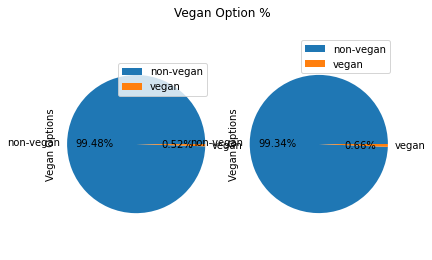

In [282]:
rural_veg_group = rural_clean_pop.groupby("Vegan Options")
urban_veg_group = urban_clean_pop.groupby("Vegan Options")
rural_veg = rural_veg_group["Vegan Options"].count()
urban_veg = urban_veg_group["Vegan Options"].count()
all_veg = pd.concat([rural_veg, urban_veg], axis=1)
all_labels = ["non-vegan", "vegan"]
all_veg.plot(kind = "pie", title = "Vegan Option %", labels = rural_labels, subplots = True, autopct = "%1.2f%%")
plt.axis("equal")
plt.show()


## Scatter plot

The correlation coefficient is -0.01


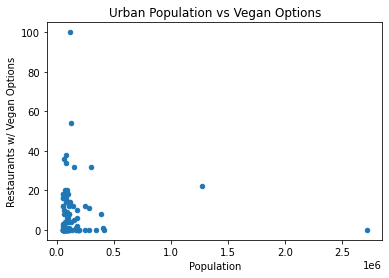

In [268]:
urban_scatter = urban_summary[["Population", "Restaurants w/ Vegan Options"]]
urban_scatter.plot(x="Population", y = "Restaurants w/ Vegan Options", kind = "scatter", title = "Urban Population vs Vegan Options")
correlation = st.pearsonr(urban_summary["Population"], urban_summary["Restaurants w/ Vegan Options"])
print(f"The correlation coefficient is {round(correlation[0],2)}")
plt.show()

The r-value is: -0.011242154307342503


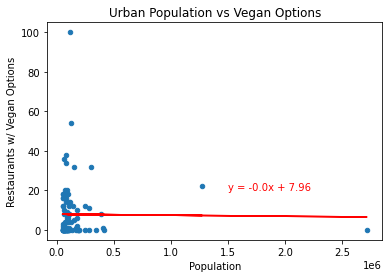

In [276]:
x = urban_summary["Population"]
y = urban_summary["Restaurants w/ Vegan Options"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = slope * x + intercept
eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
urban_scatter.plot(x = "Population", y = "Restaurants w/ Vegan Options", kind = "scatter", title = "Urban Population vs Vegan Options")
plt.plot(x, regress, "r-")
plt.annotate(eq, (1500000,20), color ="r")
print(f"The r-value is: {rvalue}")
plt.show()

The correlation coefficient is 0.28


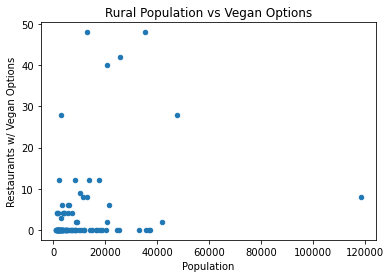

In [283]:
rural_scatter = rural_summary[["Population", "Restaurants w/ Vegan Options"]]
rural_scatter.plot(x="Population", y = "Restaurants w/ Vegan Options", kind = "scatter", title = "Rural Population vs Vegan Options")
correlation = st.pearsonr(rural_summary["Population"], rural_summary["Restaurants w/ Vegan Options"])
print(f"The correlation coefficient is {round(correlation[0],2)}")
plt.show()

The r-value is: 0.27777617374514224


NameError: name 'figsize' is not defined

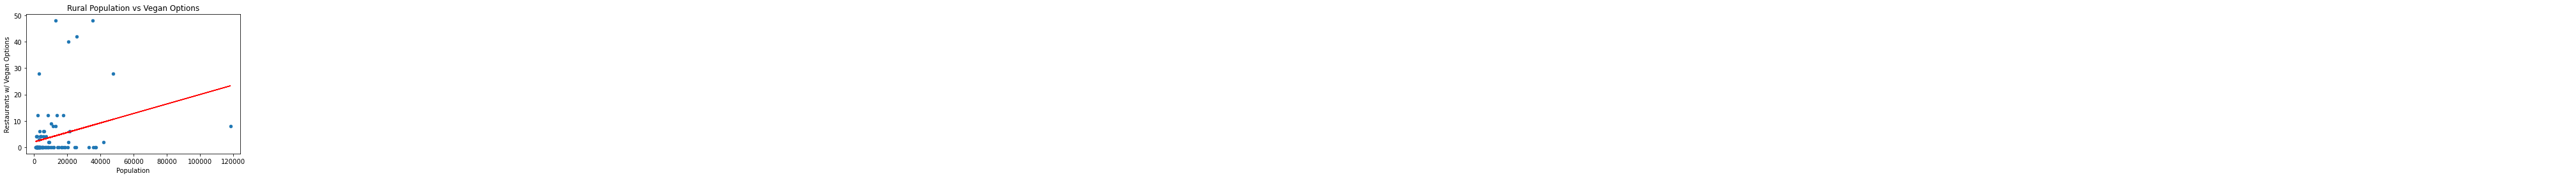

In [288]:
x = rural_summary["Population"]
y = rural_summary["Restaurants w/ Vegan Options"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = slope * x + intercept
eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
rural_scatter.plot(x = "Population", y = "Restaurants w/ Vegan Options", kind = "scatter", title = "Rural Population vs Vegan Options")
plt.plot(x, regress, "r-")
plt.annotate(eq, (1500000,20), color ="r")
print(f"The r-value is: {rvalue}")
figsize(100,100)